In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
csvs = [
    'tweet-replies/budken1_classified.csv',
    'tweet-replies/budken2_classified.csv'
]

def to_df(csv: str):
    df_tmp = pd.read_csv(csv, header=0)
    return df_tmp

dfs = list(map(to_df, csvs))
df = pd.concat(dfs, ignore_index=True)
df

tweet sentiment
0                 Pięknie pan mówi. W stylu Gebbelsa 😂  negative
1                                ciamajdan w Warszawie  negative
2                           Gomułka junior zamknij się  negative
3    To wy Budka mówicie że będziecie siłą wyprowad...  negative
4       Albo Polin, albo Putin - innego wyboru nie ma.  negative
..                                                 ...       ...
826  Boże Pan sobie ta wypowiedzią ukręcił bat na w...  negative
827     PO-wski tępak zapomniał już o ciamajdanie itp.  negative
828                             A ciamajdan pamiętasz?  negative
829           🤦🤣😂🤣😂🤣. Przecież to wasza strategia.😂🤣😂🤣  negative
830  Otóż to, organizatorów ciamajdanu wyślijmy na ...  negative

[831 rows x 2 columns]

In [12]:
df['sentiment'] = df['sentiment'].astype(pd.CategoricalDtype(ordered=True))
df['sentiment'].dtype

CategoricalDtype(categories=['negative', 'neutral', 'positive'], ordered=True)

In [13]:
df['sentiment'].value_counts()

negative    714
neutral      66
positive     51
Name: sentiment, dtype: int64

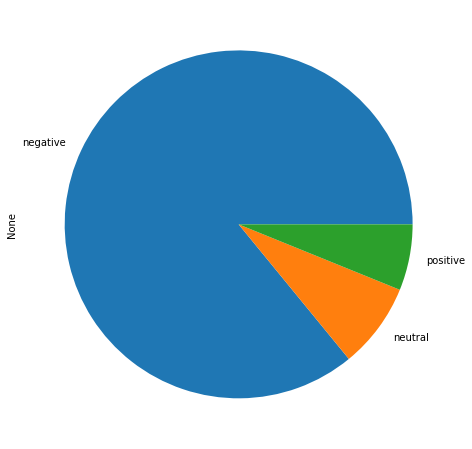

In [14]:
df.groupby(['sentiment']).size().plot.pie(figsize=(8, 8))
plt.show()

In [15]:
df

tweet sentiment
0                 Pięknie pan mówi. W stylu Gebbelsa 😂  negative
1                                ciamajdan w Warszawie  negative
2                           Gomułka junior zamknij się  negative
3    To wy Budka mówicie że będziecie siłą wyprowad...  negative
4       Albo Polin, albo Putin - innego wyboru nie ma.  negative
..                                                 ...       ...
826  Boże Pan sobie ta wypowiedzią ukręcił bat na w...  negative
827     PO-wski tępak zapomniał już o ciamajdanie itp.  negative
828                             A ciamajdan pamiętasz?  negative
829           🤦🤣😂🤣😂🤣. Przecież to wasza strategia.😂🤣😂🤣  negative
830  Otóż to, organizatorów ciamajdanu wyślijmy na ...  negative

[831 rows x 2 columns]

In [16]:
import translators as ts


def translate(sentence: str):
    from_lang = 'pl'
    to_lang = 'en'
    result = ts.server.google(sentence, from_language=from_lang, to_language=to_lang)
    return result

df['tweet translated'] = df['tweet'].apply(translate)

In [17]:
df = df[['tweet', 'tweet translated', 'sentiment']]
df

tweet  \
0                 Pięknie pan mówi. W stylu Gebbelsa 😂   
1                                ciamajdan w Warszawie   
2                           Gomułka junior zamknij się   
3    To wy Budka mówicie że będziecie siłą wyprowad...   
4       Albo Polin, albo Putin - innego wyboru nie ma.   
..                                                 ...   
826  Boże Pan sobie ta wypowiedzią ukręcił bat na w...   
827     PO-wski tępak zapomniał już o ciamajdanie itp.   
828                             A ciamajdan pamiętasz?   
829           🤦🤣😂🤣😂🤣. Przecież to wasza strategia.😂🤣😂🤣   
830  Otóż to, organizatorów ciamajdanu wyślijmy na ...   

                                      tweet translated sentiment  
0     You speak beautifully. In the style of gebbels 😂  negative  
1                                  Ciamajdan in Warsaw  negative  
2                               Gomułka Junior Shut up  negative  
3    You say that you say that you will force peopl...  negative  
4    Either Polin or Putin - there is no other choice.  negative  
..                                                 ...       ...  
826  God, this statement, touched the bat on his ow...  negative  
827  PO-WSKA GRUPAK has already forgotten about Cia...  negative  
828                         Do you remember Ciamajdan?  negative  
829                     🤦🤣 vacing. It's your strategy.  negative  
830  Well, let's send the organizers of Ciamjdan to...  negative  

[831 rows x 3 columns]

In [18]:
df.to_csv('tweet-replies/bbudka-replies-full.csv', header=True, index=False)